In [1]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from pandas.plotting import scatter_matrix
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PROJECT_CODE='PRJNA573298'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

dbname='nt'
kmer='k141'

f_contigs_file_tail=f'_{dbname}_magic_blast_asc_contigs.txt'

In [4]:
subsets=['vector','virus']

In [5]:
sra_list=['SRR10168373','SRR10168374',\
      'SRR10168375','SRR10168376',\
      'SRR10168377','SRR10168378',\
      'SRR10168379','SRR10168380',\
      'SRR10168381','SRR10168382',\
      'SRR10168383','SRR10168384',\
      'SRR10168385','SRR10168386',\
      'SRR10168387','SRR10168388',\
      'SRR10168389','SRR10168390',\
     'SRR10168391','SRR10168392','SRR10168393']

In [6]:
def read_matched(asc_file, ignore_string=None):
    contigs=[]
    accessions=[]
    desctiptions=[]
    cigars=[]
    with open(asc_file, 'r') as infile:
        data = infile.readlines()
        for i in data:
            output=i.split('\t')
            descr=output[2].split(' ',1)[1]
            if ignore_string is not None and ignore_string in descr:
                pass
            else:
                contigs.append(output[0])
                accessions.append(output[2].split(' ')[0])
                desctiptions.append(descr)
                cigars.append(output[5])
    return contigs, accessions, desctiptions, cigars

In [7]:
def process_file(asc_file, sra, ignore_string=None):
    contigs, accessions, desctiptions, cigars=read_matched(asc_file, ignore_string)
    sra_list=[sra] * len(contigs)
    df = pd.DataFrame(list(zip(sra_list, contigs, accessions, desctiptions, cigars)),
               columns =['sra', 'contig', 'accession','description','cigar'])
    return df

In [9]:
def plot_df(df, dataset):
    df['sra'].value_counts().plot(kind='bar')
    plt.title(dataset +' contig counts by SRA')
    plt.show()

In [10]:
def workflow():
    for dataset in subsets:
        path = BASE_PATH+'/contig_subsets/'+dataset+'/'
        frames=[]
        for sra in sra_list:
            f=sra+'_'+dataset+'_subset'+'_'+f_contigs_file_tail
            if dataset=='virus':
                df=process_file(path+f, sra, ignore_string='retrovirus')
            else:
                df=process_file(path+f, sra)
            if len(df)>0:
                frames.append(df)
        df_result = pd.concat(frames)
        df_result.to_csv(path+PROJECT_CODE+'_'+dataset+'_dataframe.csv')
        plot_df(df_result, dataset)

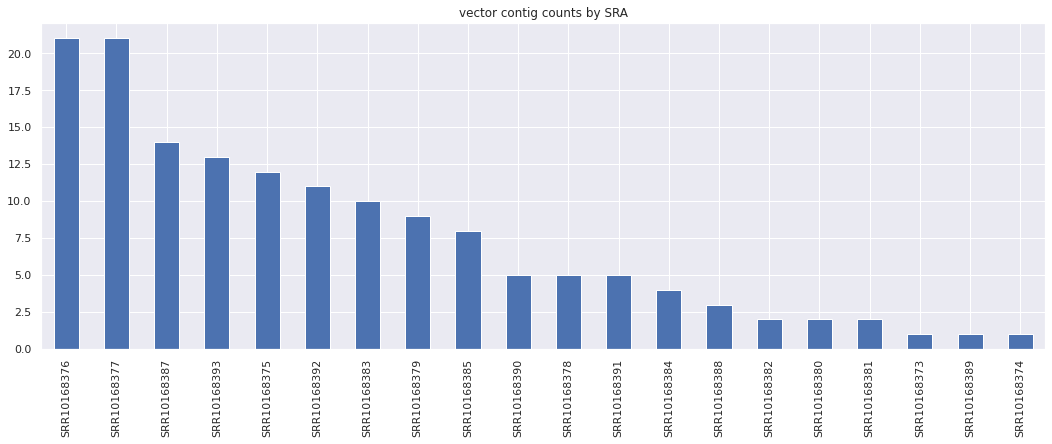

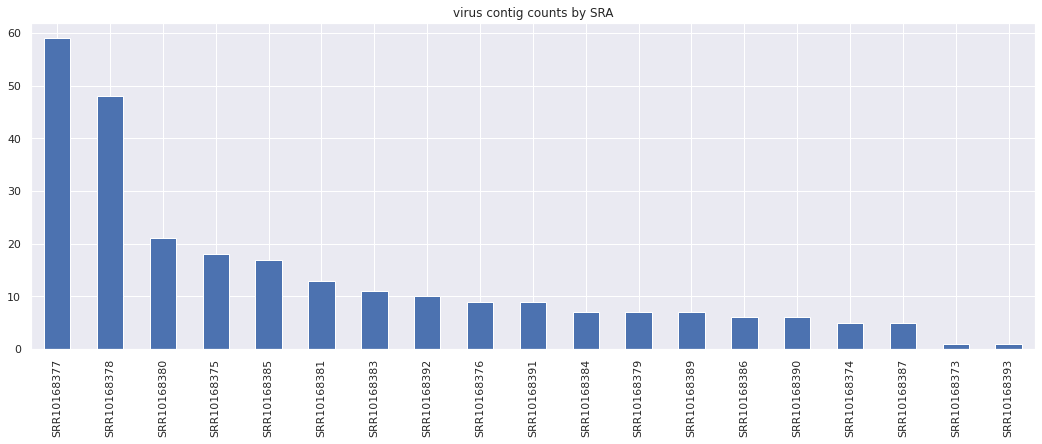

In [11]:
workflow()